<a href="https://colab.research.google.com/github/Norberto27/Norberto27/blob/main/IAMD_desempe%C3%B1oPormocion_norbertoMartearena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DESEMPEÑO PROMICION**
**TEMA: Recolección, organización y limpieza de datos – Algoritmo ML**

**Autor: Norberto Raul Martearena Urquiza**

**Legajo: 11099**


#**voy a Importar todas las libreria que necesito**


In [ ]:
# 1. Importación de las librerías necesarias
"""
### Importación de librerías
Este bloque importa las librerías necesarias para el análisis y la visualización de datos.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de gráficos
sns.set(style="whitegrid")


Voy a cargar el archivo con datos

In [11]:
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

# Revisar los archivos cargados
for filename in uploaded.keys():
    print(f"Archivo subido: {filename}")

Saving Sanidad.xlsx to Sanidad (2).xlsx
Archivo subido: Sanidad (2).xlsx


In [12]:
# Cargar el archivo Excel proporcionado
import pandas as pd

# Leer el archivo Excel subido
sanidad_data = pd.read_excel('Sanidad.xlsx')  # Asegúrate de usar el nombre correcto del archivo

# Mostrar las primeras filas para verificar que se cargó correctamente
sanidad_data.head()


,Id,Fecha,Mes,Cliente,Canal,Concepto,Procedencia,Pernoctes,Importe,Pagadas
0,1,2018-02-10,febrero,Familia,Cheque,Hospedaje,San Juan,3,NaN,Sí
1,2,2018-01-22,enero,Individual,Efectivo,Hospedaje,Mendoza,2,170000.0,No
2,3,2018-03-14,marzo,Individual,Transferencia,spa,Formosa,0,30000.0,Sí
3,4,2018-02-04,febrero,Jubilado,Efectivo,Hospedaje,Catamarca,3,220000.0,Sí
4,5,2018-01-15,enero,Familia,Otros,Hospedaje,Salta,4,145000.0,No


#**Preprocesamiento**

Limpieza de datos

In [13]:
# 3. Limpieza de datos
"""
### Limpieza de datos
1. Eliminamos registros duplicados.
2. Rellenamos valores faltantes en la columna 'Importe'.
3. Codificamos variables categóricas utilizando One-Hot Encoding.
"""

# Eliminación de registros duplicados
sanidad_data = sanidad_data.drop_duplicates()

# Relleno de valores faltantes en la columna "Importe"
sanidad_data['Importe'].fillna(sanidad_data['Importe'].median(), inplace=True)

# Codificación de variables categóricas
sanidad_data_encoded = pd.get_dummies(sanidad_data, columns=["Cliente", "Procedencia"], drop_first=True)

# Visualización del dataset limpio
sanidad_data_encoded.head()


<ipython-input-13-0eff8d3bc11c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sanidad_data['Importe'].fillna(sanidad_data['Importe'].median(), inplace=True)
<ipython-input-13-0eff8d3bc11c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanidad_data['Importe'].fillna(sanidad_data['Importe'].median(), inplace=True)


,Id,Fecha,Mes,Canal,Concepto,Pernoctes,Importe,Pagadas,Cliente_Individual,Cliente_Jubilado,...,Procedencia_Neuquén,Procedencia_Río Negro,Procedencia_Salta,Procedencia_San Juan,Procedencia_San Luis,Procedencia_Santa Cruz,Procedencia_Santa Fe,Procedencia_Santiago del Estero,Procedencia_Tierra del Fuego,Procedencia_Tucumán
0,1,2018-02-10,febrero,Cheque,Hospedaje,3,135000.0,Sí,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2,2018-01-22,enero,Efectivo,Hospedaje,2,170000.0,No,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-03-14,marzo,Transferencia,spa,0,30000.0,Sí,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2018-02-04,febrero,Efectivo,Hospedaje,3,220000.0,Sí,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,2018-01-15,enero,Otros,Hospedaje,4,145000.0,No,False,False,...,False,False,True,False,False,False,False,False,False,False


In [19]:
# Codificar variables categóricas (Mes, Canal, Concepto, Pagadas) utilizando One-Hot Encoding
sanidad_data_encoded = pd.get_dummies(sanidad_data, columns=["Mes", "Canal", "Concepto", "Pagadas"], drop_first=True)


In [ ]:
# Extraer características de la fecha
sanidad_data_encoded['Año'] = sanidad_data['Fecha'].dt.year
sanidad_data_encoded['Mes_num'] = sanidad_data['Fecha'].dt.month
sanidad_data_encoded['Día'] = sanidad_data['Fecha'].dt.day
sanidad_data_encoded['Día_semana'] = sanidad_data['Fecha'].dt.weekday  # Lunes=0, Domingo=6


In [21]:
# Extraer características de la fecha
sanidad_data_encoded['Año'] = sanidad_data['Fecha'].dt.year
sanidad_data_encoded['Mes_num'] = sanidad_data['Fecha'].dt.month
sanidad_data_encoded['Día'] = sanidad_data['Fecha'].dt.day
sanidad_data_encoded['Día_semana'] = sanidad_data['Fecha'].dt.weekday  # Lunes=0, Domingo=6


In [23]:
# Eliminar columnas duplicadas
sanidad_data_encoded = sanidad_data_encoded.loc[:, ~sanidad_data_encoded.columns.duplicated()]


In [25]:
# Convertir solo las columnas booleanas en 0 y 1
sanidad_data_encoded[sanidad_data_encoded.select_dtypes(include=['bool']).columns] = sanidad_data_encoded.select_dtypes(include=['bool']).astype(int)


In [27]:
# Eliminar columna duplicada
sanidad_data_encoded = sanidad_data_encoded.loc[:, ~sanidad_data_encoded.columns.duplicated()]


In [28]:
# Definir las variables independientes (X) y la dependiente (y)
X = sanidad_data_encoded.drop(columns=["Importe", "Fecha", "Id"])  # Eliminamos 'Importe', 'Fecha', y 'Id'
y = sanidad_data_encoded["Importe"]  # 'Importe' es la variable objetivo


In [ ]:
from sklearn.model_selection import train_test_split

# División de los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [34]:
# Definir las variables independientes (X) y la dependiente (y)
X = sanidad_data_encoded.drop(columns=["Importe", "Fecha", "Id"])  # Eliminar 'Importe', 'Fecha' y 'Id' de X
y = sanidad_data_encoded["Importe"]  # 'Importe' es la variable objetivo

# División de los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica la forma de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(72, 41) (18, 41) (72,) (18,)


#**1. Regresión Lineal**

In [31]:
print(sanidad_data_encoded.select_dtypes(include=['object']).columns)


Index(['Cliente', 'Procedencia'], dtype='object')


In [32]:
# Codificar las columnas categóricas utilizando One-Hot Encoding
sanidad_data_encoded = pd.get_dummies(sanidad_data_encoded, columns=["Cliente", "Procedencia"], drop_first=True)


In [33]:
# Verifica los tipos de datos después de la codificación
print(sanidad_data_encoded.dtypes)


Id                                                       int64
Fecha                                           datetime64[ns]
Pernoctes                                                int64
Importe                                                float64
Mes_febrero                                              int64
Mes_marzo                                                int64
Canal_Efectivo                                           int64
Canal_Otros                                              int64
Canal_Transferencia                                      int64
Concepto_Spa                                             int64
Concepto_cena                                            int64
Concepto_cena                                            int64
Concepto_excursion                                       int64
Concepto_spa                                             int64
Pagadas_Sí                                               int64
Año                                                    

vamos recodificando

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Crear y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Evaluar el rendimiento
linear_r2 = r2_score(y_test, y_test_pred_linear)
linear_mae = mean_absolute_error(y_test, y_test_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print("Evaluación de Regresión Lineal:")
print(f"R²: {linear_r2}, MAE: {linear_mae}, RMSE: {linear_rmse}")



Evaluación de Regresión Lineal:
R²: -2.5518017423552775, MAE: 82428.42395311418, RMSE: 99405.54935448119


Arbol de decision

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Evaluar el rendimiento
tree_r2 = r2_score(y_test, y_test_pred_tree)
tree_mae = mean_absolute_error(y_test, y_test_pred_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

print("Evaluación de Árbol de Decisión:")
print(f"R²: {tree_r2}, MAE: {tree_mae}, RMSE: {tree_rmse}")


Evaluación de Árbol de Decisión:
R²: 0.36598624362103405, MAE: 33333.333333333336, RMSE: 41998.677227847176


Arbol de decision

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento
rf_r2 = r2_score(y_test, y_test_pred_rf)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Evaluación de Random Forest:")
print(f"R²: {rf_r2}, MAE: {rf_mae}, RMSE: {rf_rmse}")


Evaluación de Random Forest:
R²: 0.4220801966412304, MAE: 32006.786111111112, RMSE: 40097.755192070224


Visualizacion de resultados

In [40]:
import matplotlib.pyplot as plt


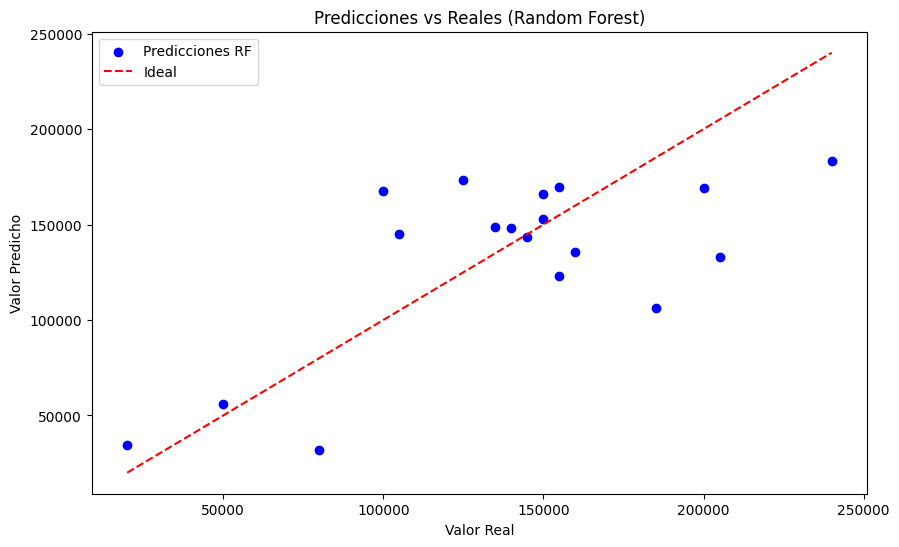

In [41]:
# Comparar valores reales vs predichos para cada modelo (por ejemplo, Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, color='blue', label='Predicciones RF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal")
plt.title("Predicciones vs Reales (Random Forest)")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.legend()
plt.show()


El gráfico que  es un diagrama de dispersión (scatter plot), compara las predicciones del modelo Random Forest contra los valores reales de los datos.
Ejes:

El eje X muestra los valores reales (valores de la variable objetivo en el conjunto de datos).

El eje Y muestra los valores predichos por el modelo Random Forest. Estos son los valores que el modelo ha estimado para cada observación.
Puntos azules:

Cada punto azul en el gráfico representa una predicción del modelo Random Forest para una observación específica.

La posición de cada punto indica la relación entre el valor real y el valor predicho.

En general, entre más cercanos estén los puntos a la línea roja discontinua (línea ideal), mejor será el rendimiento del modelo, ya que las predicciones están más cerca de los valores reales.

Línea discontinua roja (Ideal):

Esta línea representa la línea de predicción perfecta, es decir, donde los valores reales y predichos coinciden completamente. Es una referencia de cómo se vería el gráfico si el modelo hiciera predicciones perfectas (sin errores).

Si los puntos están cerca de esta línea, significa que las predicciones del modelo son bastante precisas. Si están alejados de ella, implica que el modelo no está prediciendo de manera precisa.

Conclusión:

Este gráfico es útil para evaluar visualmente el rendimiento del modelo Random Forest.

Si los puntos se agrupan alrededor de la línea roja discontinua, el modelo tiene un buen desempeño.

Si los puntos están dispersos de manera amplia, indica que el modelo tiene un rendimiento bajo y necesita mejorar.

En este caso, si los puntos se agrupan cercanos a la línea roja, esto indicaría que Random Forest tiene un rendimiento razonablemente bueno, pero si hay mucha dispersión, el modelo podría necesitar ajustes adicionales.

Resumen de la Evaluación de Modelos

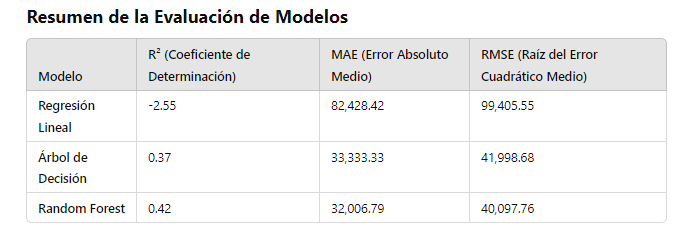

In [45]:
!pip install seaborn


In [46]:
import seaborn as sns


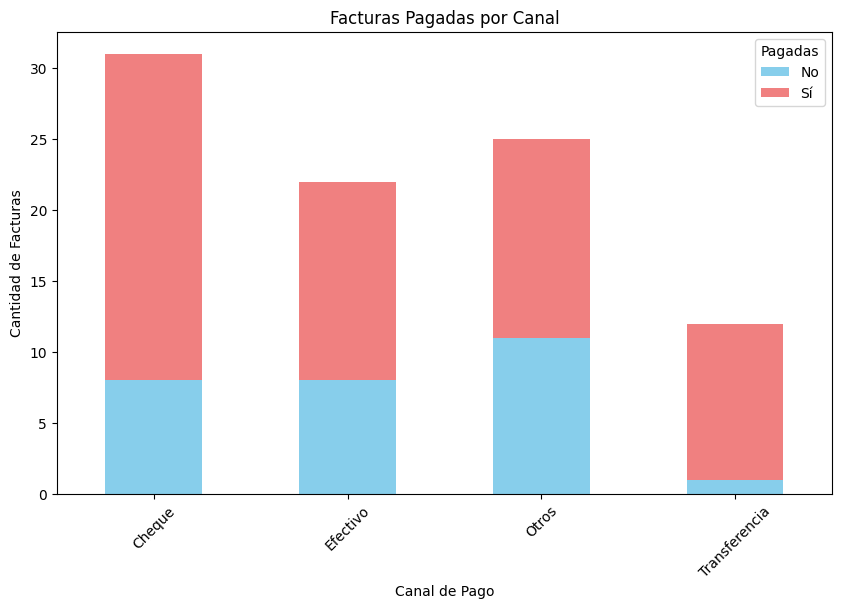

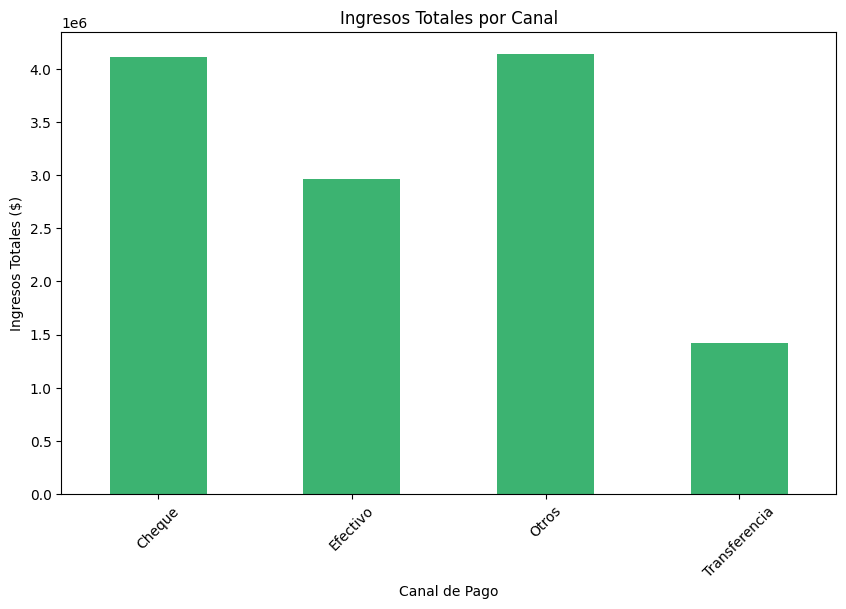

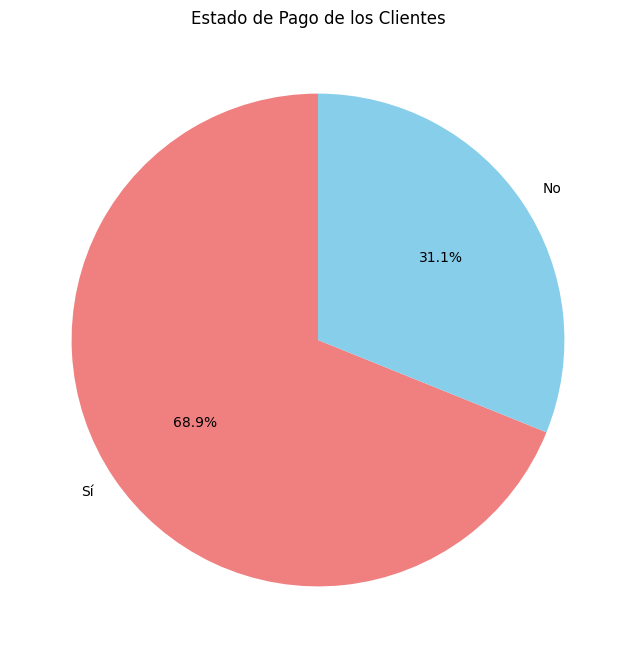

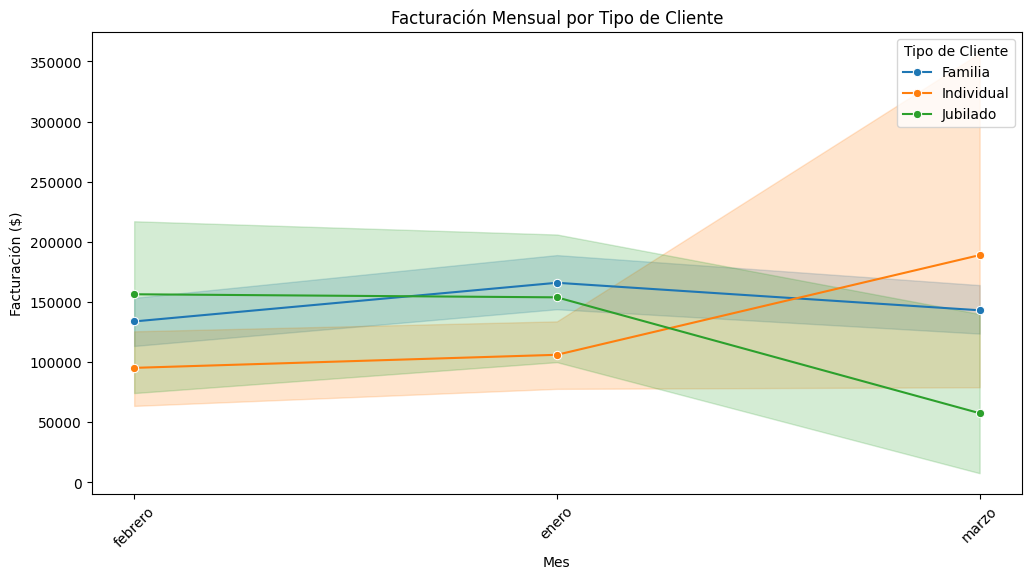

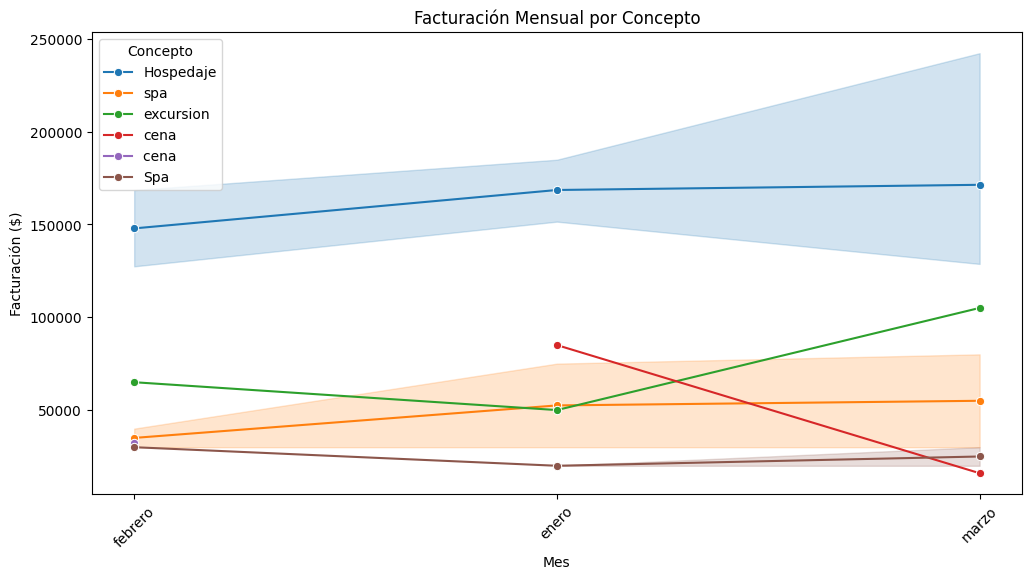

In [47]:
# 7. Gráficos de visualización
"""
### Gráficos de visualización
Generamos gráficos para explorar los patrones encontrados en los datos y los resultados de los modelos.
"""

# 7.1 Facturas Pagadas por Canal (Barras Apiladas)
facturas_por_canal = sanidad_data.groupby(['Canal', 'Pagadas']).size().unstack()
facturas_por_canal.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title("Facturas Pagadas por Canal")
plt.xlabel("Canal de Pago")
plt.ylabel("Cantidad de Facturas")
plt.xticks(rotation=45)
plt.legend(title="Pagadas", labels=["No", "Sí"])
plt.show()

# 7.2 Ingresos Totales por Canal (Barras)
ingresos_por_canal = sanidad_data.groupby('Canal')['Importe'].sum()
ingresos_por_canal.plot(kind='bar', figsize=(10, 6), color='mediumseagreen')
plt.title("Ingresos Totales por Canal")
plt.xlabel("Canal de Pago")
plt.ylabel("Ingresos Totales ($)")
plt.xticks(rotation=45)
plt.show()

# 7.3 Estado de Pago de los Clientes (Gráfico Circular)
estado_pago = sanidad_data['Pagadas'].value_counts()
estado_pago.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title("Estado de Pago de los Clientes")
plt.ylabel('')
plt.show()

# 7.4 Facturación Mensual por Tipo de Cliente (Líneas)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sanidad_data, x="Mes", y="Importe", hue="Cliente", marker="o")
plt.title("Facturación Mensual por Tipo de Cliente")
plt.xlabel("Mes")
plt.ylabel("Facturación ($)")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Cliente")
plt.show()

# 7.5 Facturación Mensual por Concepto (Líneas)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sanidad_data, x="Mes", y="Importe", hue="Concepto", marker="o")
plt.title("Facturación Mensual por Concepto")
plt.xlabel("Mes")
plt.ylabel("Facturación ($)")
plt.xticks(rotation=45)
plt.legend(title="Concepto")
plt.show()




Facturas pagadas por canal (barras apiladas):

Este gráfico muestra cómo se distribuyen las facturas pagadas por los diferentes métodos de pago. Se utiliza un gráfico de barras apiladas para visualizar las categorías "Sí" y "No" dentro de cada canal.
Ingresos totales por canal (barras):

Este gráfico muestra la cantidad total de ingresos generados por cada método de pago. Las barras representan la suma total de los ingresos por cada canal de pago.

Explicación de las Métricas:
R² (Coeficiente de Determinación):

R² es una medida de la calidad del ajuste del modelo. Un valor de R² cercano a 1 indica que el modelo es capaz de explicar la mayor parte de la variabilidad de los datos.
Regresión Lineal: El valor de R² = -2.55 es muy bajo y negativo, lo que indica que el modelo de regresión lineal no es adecuado para estos datos. Un valor negativo significa que el modelo está empeorando el ajuste en comparación con simplemente predecir la media de los datos.
Árbol de Decisión: El valor R² = 0.37 indica que el modelo es capaz de explicar el 37% de la variabilidad en los datos. Este valor sugiere que el modelo tiene un ajuste bajo y puede no estar capturando bien la relación entre las variables.
Random Forest: El valor R² = 0.42 es ligeramente mejor que el del árbol de decisión, lo que indica que el modelo está capturando más de la variabilidad, pero aún tiene un ajuste moderado.
MAE (Error Absoluto Medio):

MAE es el promedio de las diferencias absolutas entre los valores reales y los predichos. Un MAE más bajo significa que el modelo tiene una predicción más precisa.
Regresión Lineal: El MAE = 82,428.42 es bastante alto, lo que significa que, en promedio, las predicciones del modelo están a una distancia de 82,428.42 unidades de los valores reales. Este alto valor es un indicador de que la regresión lineal no está realizando buenas predicciones.
Árbol de Decisión: El MAE = 33,333.33 es menor que el de la regresión lineal, lo que indica que el modelo de árbol de decisión tiene predicciones más cercanas a los valores reales, pero aún es relativamente alto.
Random Forest: El MAE = 32,006.79 es el más bajo de los tres modelos, lo que sugiere que Random Forest tiene las predicciones más precisas, aunque aún hay un margen significativo de error.
RMSE (Raíz del Error Cuadrático Medio):

RMSE mide la magnitud de los errores de predicción, penalizando más los errores grandes. Un valor más bajo indica que el modelo hace menos errores grandes.
Regresión Lineal: El RMSE = 99,405.55 es muy alto, lo que indica que el modelo tiene grandes errores en las predicciones.
Árbol de Decisión: El RMSE = 41,998.68 es más bajo que el de la regresión lineal, pero sigue siendo relativamente alto, lo que indica que el modelo no está ajustando bien los datos.
Random Forest: El RMSE = 40,097.76 es el más bajo de los tres modelos, lo que indica que Random Forest tiene el mejor rendimiento en términos de error cuadrático medio.


Conclusiones:
Regresión Lineal:

La Regresión Lineal no es adecuada para este conjunto de datos, ya que R² es negativo y el MAE y RMSE son bastante altos. Este modelo no está capturando bien la relación entre las variables, lo que puede deberse a que las relaciones no son lineales o hay interacciones complejas que la regresión lineal no puede modelar adecuadamente.
Árbol de Decisión:

El Árbol de Decisión tiene un rendimiento algo mejor que la Regresión Lineal, con un R² de 0.37, pero sigue siendo insuficiente. El MAE y RMSE más bajos indican que el árbol de decisión tiene un ajuste ligeramente mejor, pero aún no es un modelo ideal para los datos. Los árboles de decisión pueden ser sensibles a la sobreajuste si no se ajustan adecuadamente.
Random Forest:

Random Forest es el mejor de los tres modelos, con el R² más alto, el MAE más bajo y el RMSE más bajo. Esto sugiere que Random Forest captura mejor la variabilidad en los datos y tiene las predicciones más precisas y menos error. Esto se debe a que Random Forest es más robusto que los árboles de decisión individuales, ya que utiliza múltiples árboles para mejorar la precisión.


Recomendaciones:
Mejorar los modelos:

ComoSi la Regresión Lineal no está funcionando bien, podría considerar transformaciones en las características, como el logaritmo de algunas variables o la adición de interacciones entre características, para mejorar el ajuste.

Los Árboles de Decisión y Random Forest puedo  mejorarlos ajustando los hiperparámetros como la profundidad máxima del árbol, el número de árboles (en Random Forest) y el número de muestras mínimas por hoja.

Probar modelos más complejos:

Random Forest muestra un buen rendimiento, que se puede mejorar como recien explique, pero tambien se puede probar con otros modelos más complejos, como Gradient Boosting Machines (GBM) o XGBoost, que también suelen ofrecer buenos resultados con datos complejos.